In [1]:
# change runtime to t4 gpu

In [2]:
# handwritten digit classsification

In [3]:
# import dataset

In [4]:
from keras.datasets import mnist

In [5]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
xtrain.shape # total 60000 images of 28*28

(60000, 28, 28)

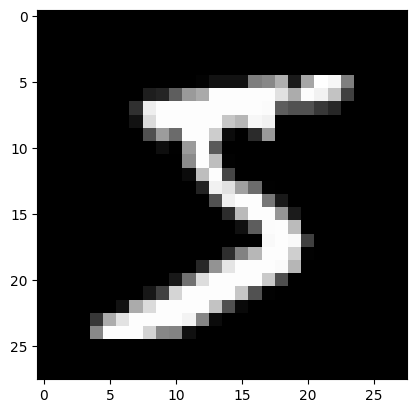

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray') # xtrain ka pehla image [0]
plt.show()

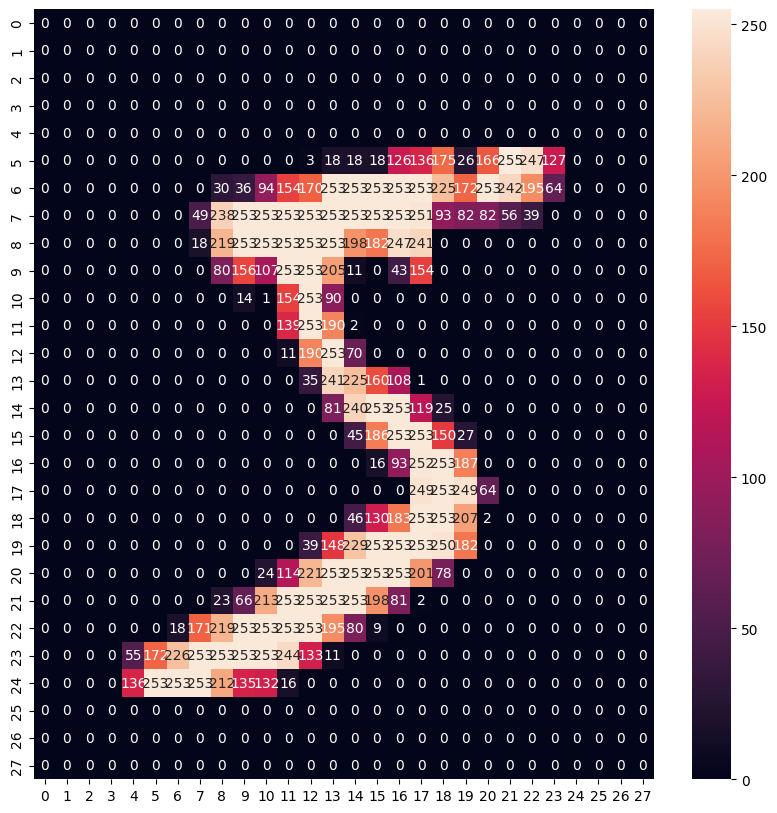

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

In [11]:
# view first 9 img from train

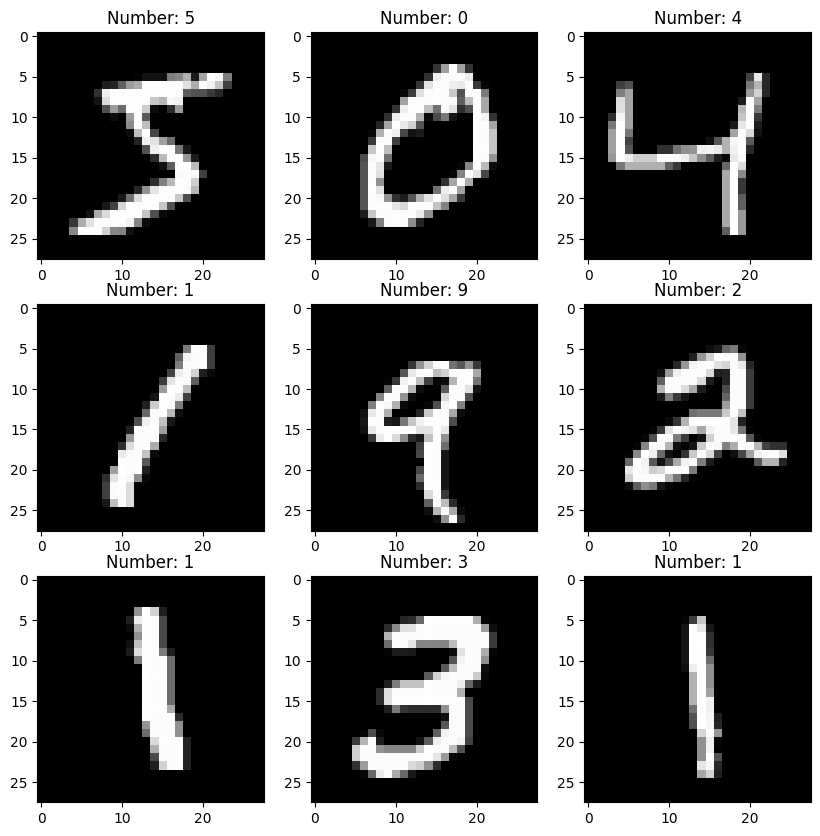

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number: {ytrain[i]}')



In [14]:
# preprocessing the data


In [17]:
# pixels values are between 0 to 255 so divide xtrain and xtest by scale them to 0 to 255


In [18]:
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [19]:
# check how many unique values are in outout training

In [20]:
import numpy as np

In [21]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
# for multiclass classfication apply one hot encoding on y feature

In [23]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)


In [24]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [26]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dropout,Dense # for feature edxtracting

In [35]:
# visual demo of cnn
# https://deeplizard.com/resource/pavq7noze2 # fliter aplly hote hai feature extracting ke liye

In [36]:
#initialize the model
model = Sequential()

#add input layer
model.add(Input(shape=(28,28,1)))

#add convolution layer 1
model.add(Convolution2D(filters=32 , activation ='relu', kernel_size=(3,3)))

# we dont have to woory about the values in filter matrix

#add  max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#add covolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

#add max pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

#add a flatten layer
model.add(Flatten())

#add a dropout layer
model.add(Dropout(0.5))

#create a output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [37]:
# compile and fit the model

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 [==============================] - 13s 5ms/step - loss: 0.7619 - accuracy: 0.8729 - val_loss: 0.0846 - val_accuracy: 0.9743
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1641 - accuracy: 0.9502 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9624 - val_loss: 0.0642 - val_accuracy: 0.9822
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1162 - accuracy: 0.9650 - val_loss: 0.0627 - val_accuracy: 0.9816
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0995 - accuracy: 0.9698 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0471 - val_accuracy

In [40]:
# plot learning curve


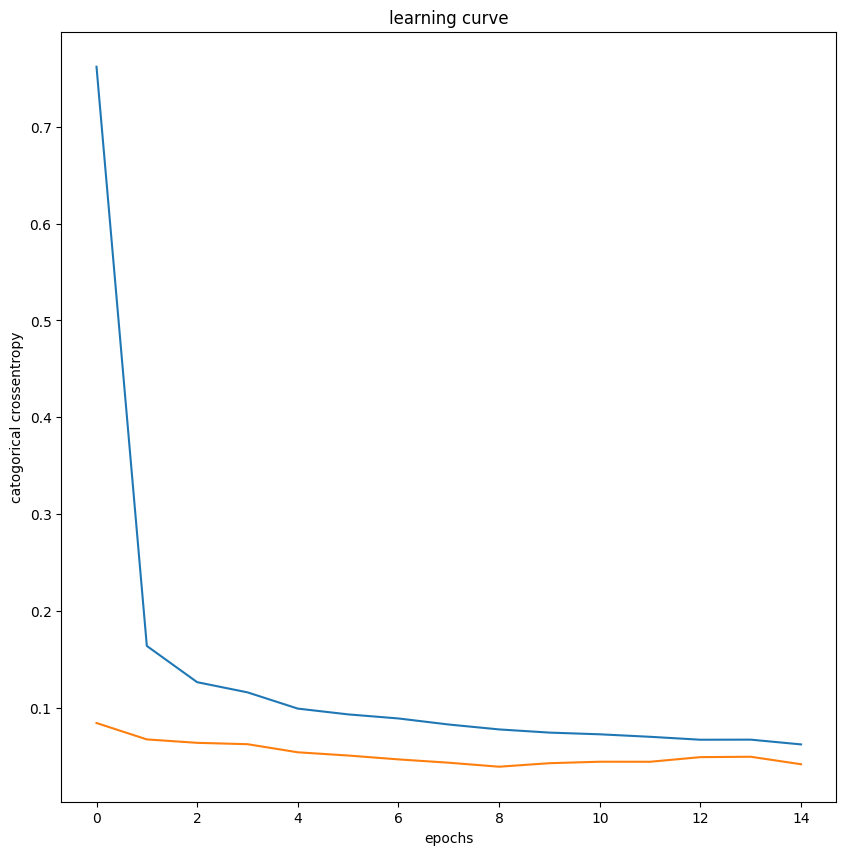

In [42]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('catogorical crossentropy')
plt.title('learning curve')
plt.show()

In [43]:
# model evaluation

In [44]:
model.evaluate(xtrain,ytrain_cat)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0193 - accuracy: 0.9941


[0.019324002787470818, 0.9940666556358337]

In [45]:
# predict probabilty for traing and testing

In [46]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [47]:
yprob_train[:5]

array([[5.6119527e-16, 3.0932398e-15, 6.3479817e-15, 7.6250121e-06,
        8.2873148e-17, 9.9999237e-01, 3.3769950e-14, 4.7870816e-13,
        2.7027662e-08, 5.9001248e-10],
       [1.0000000e+00, 1.7974612e-17, 5.4444800e-09, 1.5779835e-12,
        3.8068957e-13, 1.5151827e-13, 1.3050717e-08, 1.4047268e-13,
        5.3764126e-09, 8.0508678e-10],
       [5.0922636e-16, 9.6236725e-08, 3.1023561e-14, 1.3001666e-15,
        9.9999928e-01, 9.8039779e-12, 8.9962099e-15, 2.1518591e-07,
        2.2984956e-09, 3.5725466e-07],
       [1.2790013e-08, 9.9992120e-01, 2.1074571e-07, 2.4578531e-10,
        5.3190968e-05, 6.3351338e-11, 9.4281432e-08, 1.3552001e-05,
        1.1433214e-05, 3.0720250e-07],
       [2.3321074e-14, 2.9165174e-13, 8.8186645e-12, 1.5310291e-11,
        5.6169370e-06, 3.9192663e-11, 1.5910369e-16, 9.8048451e-07,
        5.5776627e-07, 9.9999285e-01]], dtype=float32)

In [48]:
# give final predictions

In [49]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

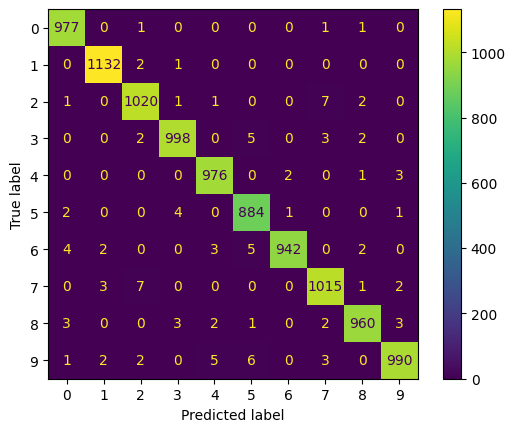

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()